In [1]:
import lightkurve as lk
tpf = lk.search_targetpixelfile("Kepler-10", quarter=3).download()

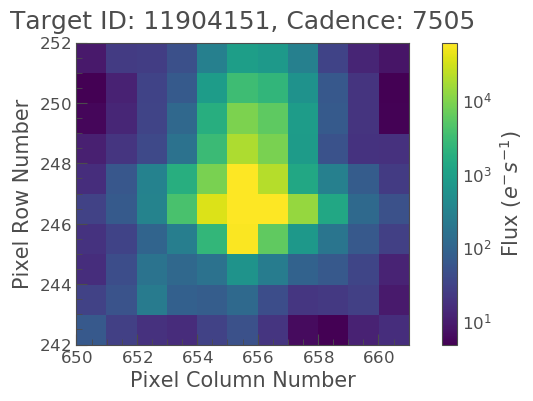

In [2]:
tpf.plot(frame=100, scale='log', show_colorbar=True);

In [3]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

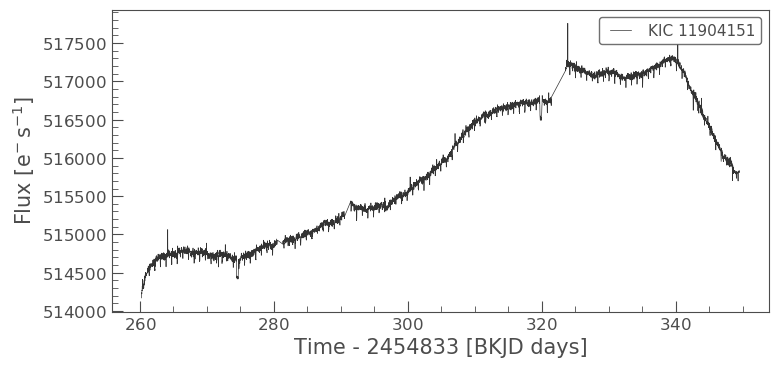

In [4]:
lc.plot();

In [5]:
flat, trend = lc.flatten(window_length=301, return_trend=True)

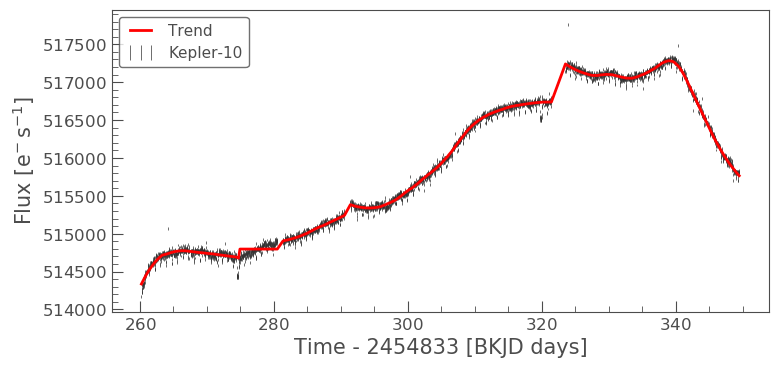

In [6]:
ax = lc.errorbar(label="Kepler-10")                   # plot() returns a matplotlib axes ...
trend.plot(ax=ax, color='red', lw=2, label='Trend');  # which we can pass to the next plot() to use the same axes

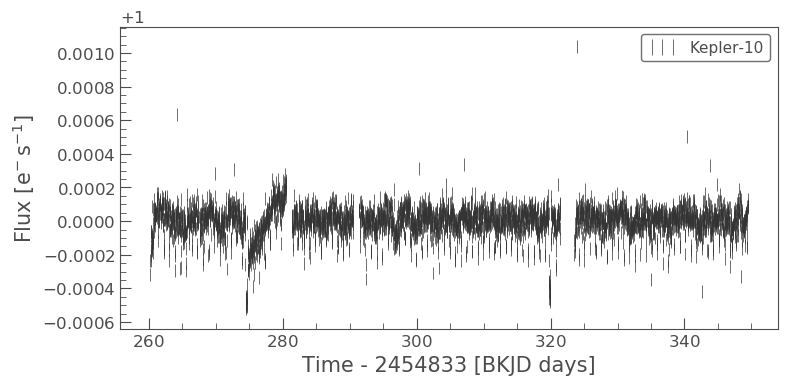

In [7]:
flat.errorbar(label="Kepler-10");

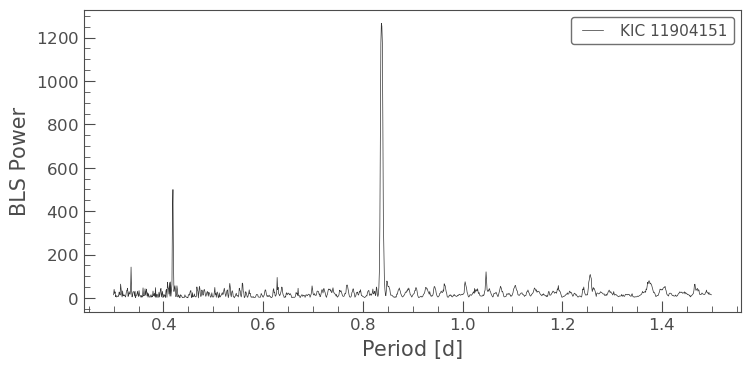

In [8]:
import numpy as np
periodogram = flat.to_periodogram(method="bls", period=np.arange(0.3, 1.5, 0.001))
periodogram.plot();

In [9]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 0.837 d


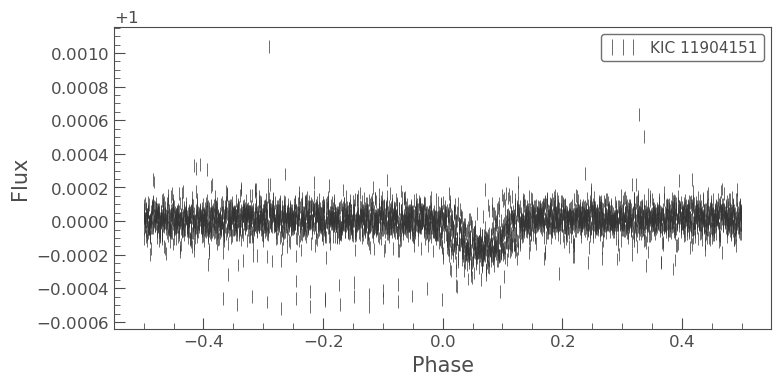

In [10]:
flat.fold(period=best_fit_period, t0=periodogram.transit_time_at_max_power).errorbar();

In [26]:
import lightkurve as lk

In [27]:
search_result = lk.search_targetpixelfile('Pi Mensae', mission='TESS', sector=1)

In [28]:
search_result

SearchResult containing 1 data products.

target_name                     productFilename                        description     distance
----------- ------------------------------------------------------- ------------------ --------
  261136679 tess2018206045859-s0001-0000000261136679-0120-s_tp.fits Target pixel files      0.0

In [29]:
tpf = search_result.download(quality_bitmask='default')

In [30]:
tpf

TessTargetPixelFile(TICID: 261136679)

In [31]:
tpf.mission

'TESS'

In [32]:
tpf.targetid

261136679

In [33]:
tpf.sector

1

In [34]:
tpf.camera

4

In [35]:
tpf.ccd

2

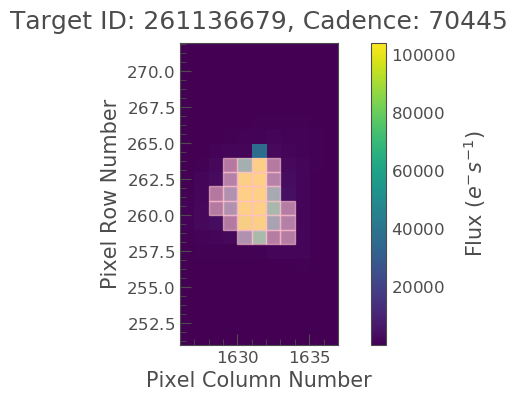

In [36]:
%matplotlib inline
tpf.plot(aperture_mask=tpf.pipeline_mask);